In [1]:
require(ggplot2)
require(dplyr)
require(tidyverse)
require(RColorBrewer)

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: RColorBrewer



In [2]:
# getwd()
setwd("/content/drive/MyDrive/AAFT_Draft/Data")

In [5]:
source("Cleaning.R")

In [6]:
dim(profiles)
head(profiles)

[1] 81044    20

,ID,gender,age,income,marr,job,loc,marExp,parExp,marType,child,childExp,cert,cores,jobType,locPref,ssPar,ssParExp,out,edu
,<int>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,117,Male,28,NA,Single,NA,郴州市 嘉禾县,型婚不易，且行且珍惜，希望能和亲人一样相处，相互尊重，相互理解，,有BF,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,118,Female,28,< 50k,Single,Ordinary Employee,湘西州 泸溪县,希望你性格好 幽默 如果要孩子必须科学方式 希望能从朋友到亲人 相处,已有对象,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,119,Male,29,50 to 100k,Single,Ordinary Employee,株洲市 芦淞区,我是单亲家庭没有什么负担，国企工作，相貌端正性格温和好相处。希望找个*婚意向坚定的人，在婚姻里我会承担好我的责任，一起面对以后的生活。,TA还没有填写BF/GF期望，你可以私信给TA进一步了解~,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,120,Male,33,50 to 100k,Single,Technician,长沙市 长沙县,希望能像真正的家人一样相处，不要过于*式，一起孝顺对方的父母。,不找同性,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,121,Male,33,50 to 100k,Single,Ordinary Employee,郴州市,互相理解，处理好对方家庭关系，完成父母的心愿！也希望两个人像兄妹一样，把对作为好朋友亲戚看待！,有朋友。,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,122,Male,38,NA,Single,NA,长沙市 雨花区,我的爱情不要暧昧，不要游戏，不要借口，不要谎言，不要灰色地带，不要挖空心思，不要不见天日，不要拖泥带水，不要顾左右而言他，更不要所谓的三人行。,TA还没有填写BF/GF期望，你可以私信给TA进一步了解~,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


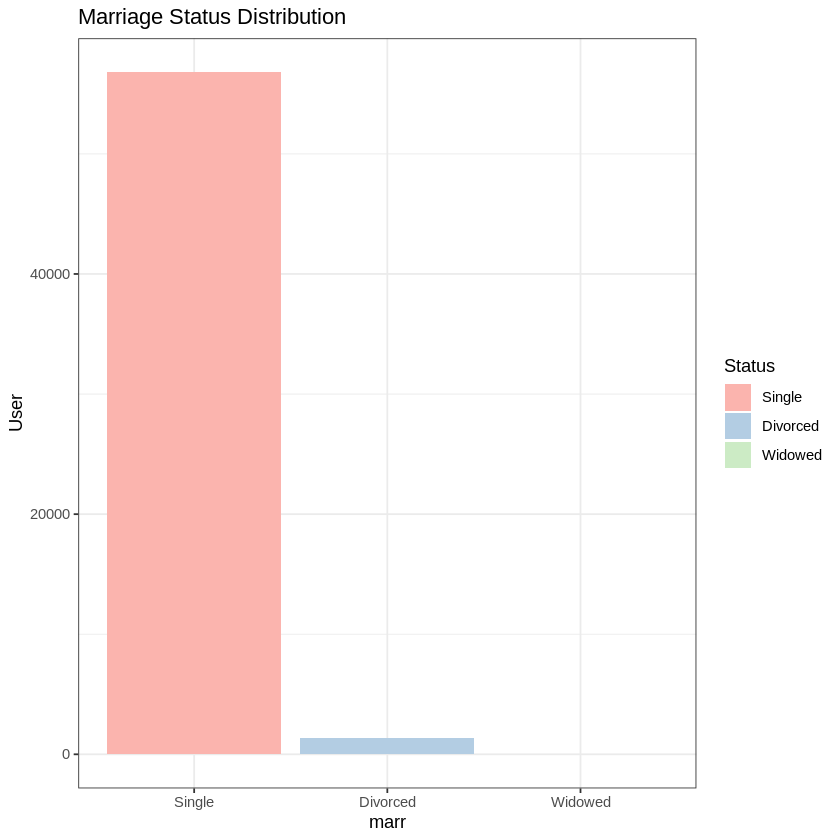

In [7]:
# unique(profiles$marr)
profiles$marr <- factor(profiles$marr, levels = c("Single", "Divorced", "Widowed"))

ggplot(profiles %>% filter(!is.na(marr)), aes(x = marr, fill = marr)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(y = "User", title = "Marriage Status Distribution", fill = "Status") +
  theme_bw()

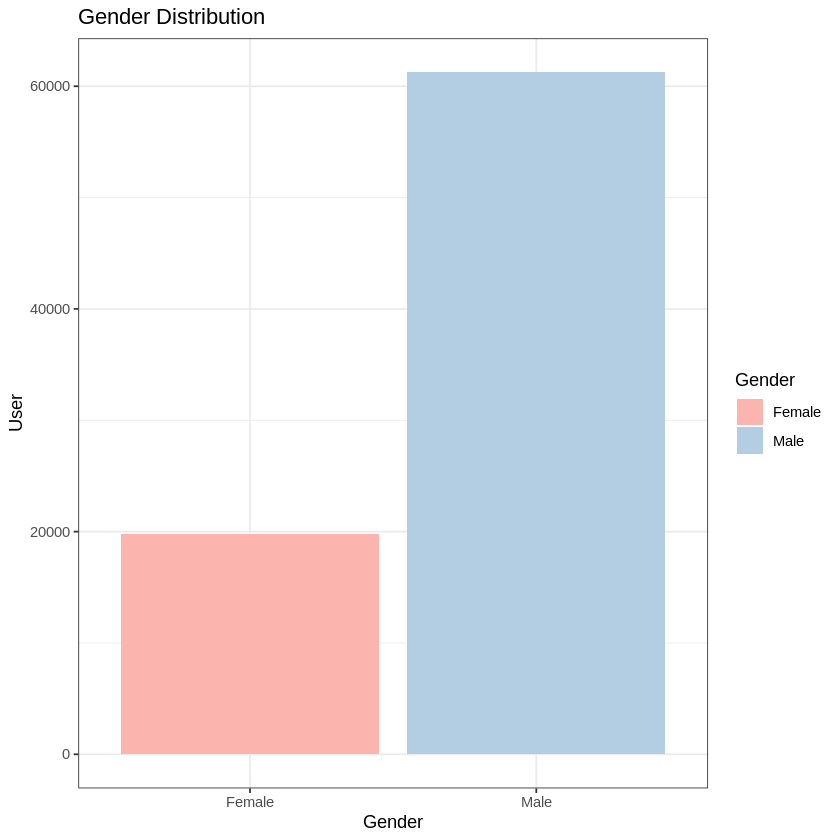

In [8]:
ggplot(profiles %>% filter(!is.na(gender)), aes(x = gender, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Gender", y = "User", title = "Gender Distribution", fill = "Gender") +
  theme_bw()

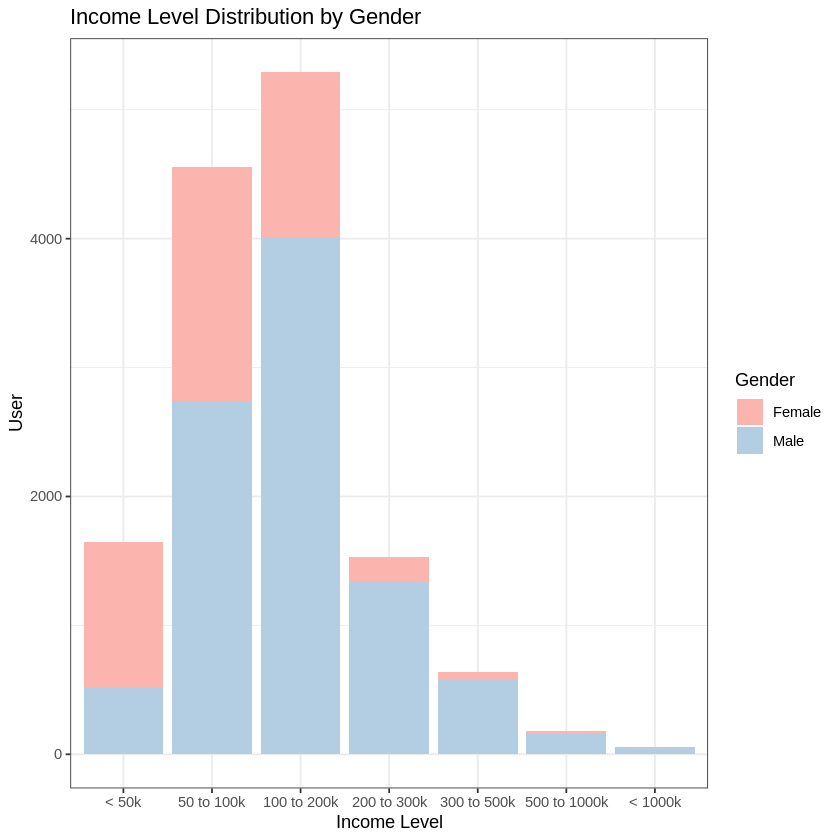

In [9]:
ggplot(profiles %>% filter(!is.na(income)), aes(x = income, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Income Level", y = "User", title = "Income Level Distribution by Gender", fill = "Gender") +
  theme_bw()

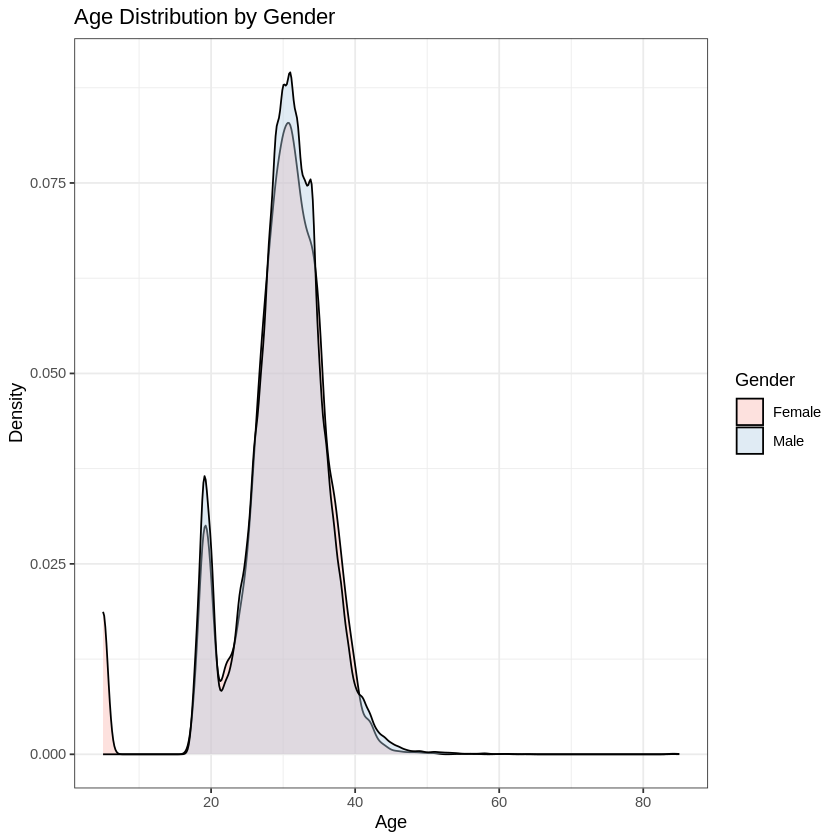

In [10]:
ggplot(profiles %>% filter(!is.na(age)), aes(x = age, fill = gender)) +
  geom_density(alpha = 0.4) +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Age Distribution by Gender", x = "Age", y = "Density", fill = "Gender") +
  theme_bw()

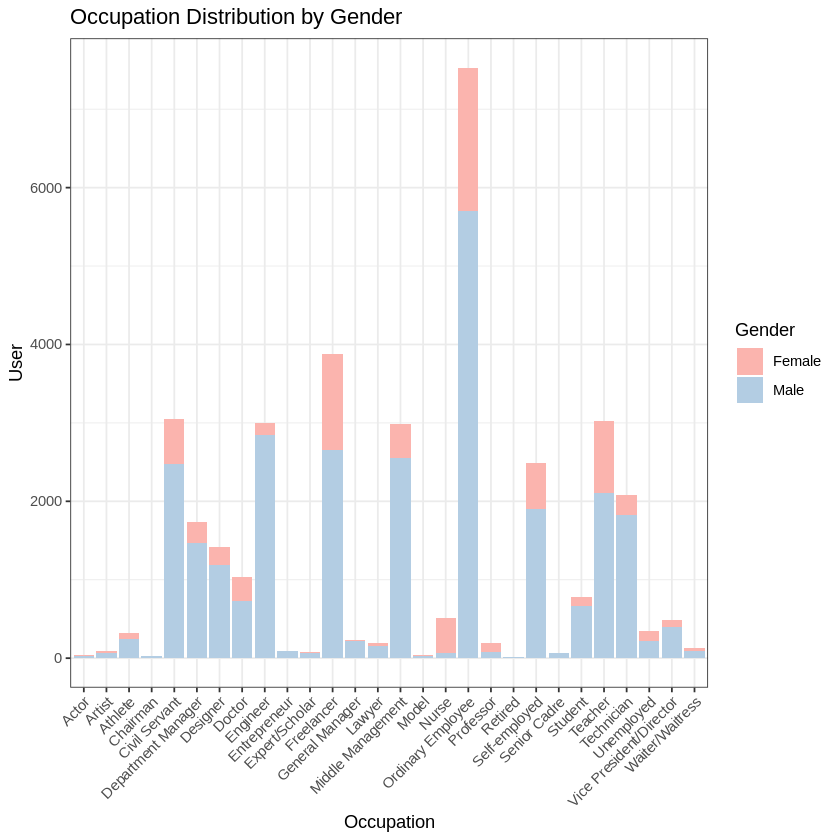

In [11]:
ggplot(profiles %>% filter(!is.na(job)), aes(x = job, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Occupation", y = "User", title = "Occupation Distribution by Gender", fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

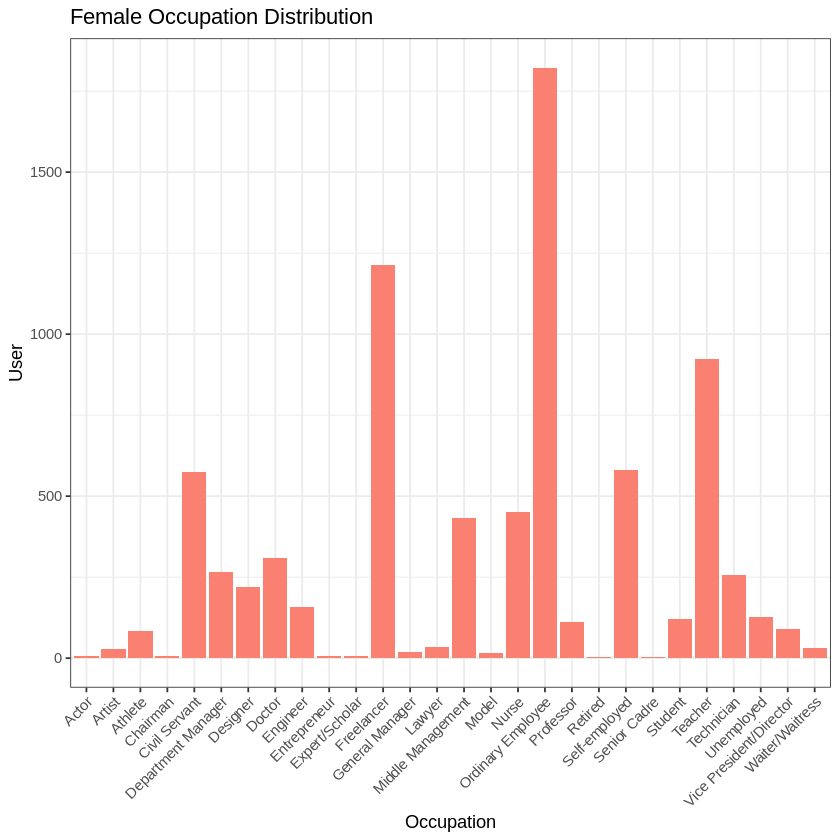

In [12]:
ggplot(profiles %>% filter(gender == "Female", !is.na(job)), aes(x = job)) +
  geom_bar(fill = "salmon") +
  scale_fill_brewer(palette = "Pastel1") +
  labs(x = "Occupation", y = "User", title = "Female Occupation Distribution") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))